In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/dipay/OneDrive/Desktop/Automobile_data.csv')
dimensions=df.shape
structure=df.info()
summary=df.describe(include='all')

dimensions,structure,summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

((205, 26),
 None,
          symboling normalized-losses    make fuel-type aspiration  \
 count   205.000000               205     205       205        205   
 unique         NaN                52      22         2          2   
 top            NaN                 ?  toyota       gas        std   
 freq           NaN                41      32       185        168   
 mean      0.834146               NaN     NaN       NaN        NaN   
 std       1.245307               NaN     NaN       NaN        NaN   
 min      -2.000000               NaN     NaN       NaN        NaN   
 25%       0.000000               NaN     NaN       NaN        NaN   
 50%       1.000000               NaN     NaN       NaN        NaN   
 75%       2.000000               NaN     NaN       NaN        NaN   
 max       3.000000               NaN     NaN       NaN        NaN   
 
        num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
 count           205        205          205             2

In [4]:
df.replace('?',pd.NA,inplace=True)
df.replace('na',pd.NA,inplace=True)

for column in df.columns:
    df[column]=pd.to_numeric(df[column],errors='coerce')
missing_values=df.isnull().sum()
df.fillna(df.mean(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

missing_values_after=df.isnull().sum()

missing_values,missing_values_after

(symboling              0
 normalized-losses      0
 make                 205
 fuel-type            205
 aspiration           205
 num-of-doors         205
 body-style           205
 drive-wheels         205
 engine-location      205
 wheel-base             0
 length                 0
 width                  0
 height                 0
 curb-weight            0
 engine-type          205
 num-of-cylinders     205
 engine-size            0
 fuel-system          205
 bore                   0
 stroke                 0
 compression-ratio      0
 horsepower             0
 peak-rpm               0
 city-mpg               0
 highway-mpg            0
 price                  0
 dtype: int64,
 symboling              0
 normalized-losses      0
 make                 205
 fuel-type            205
 aspiration           205
 num-of-doors         205
 body-style           205
 drive-wheels         205
 engine-location      205
 wheel-base             0
 length                 0
 width                 

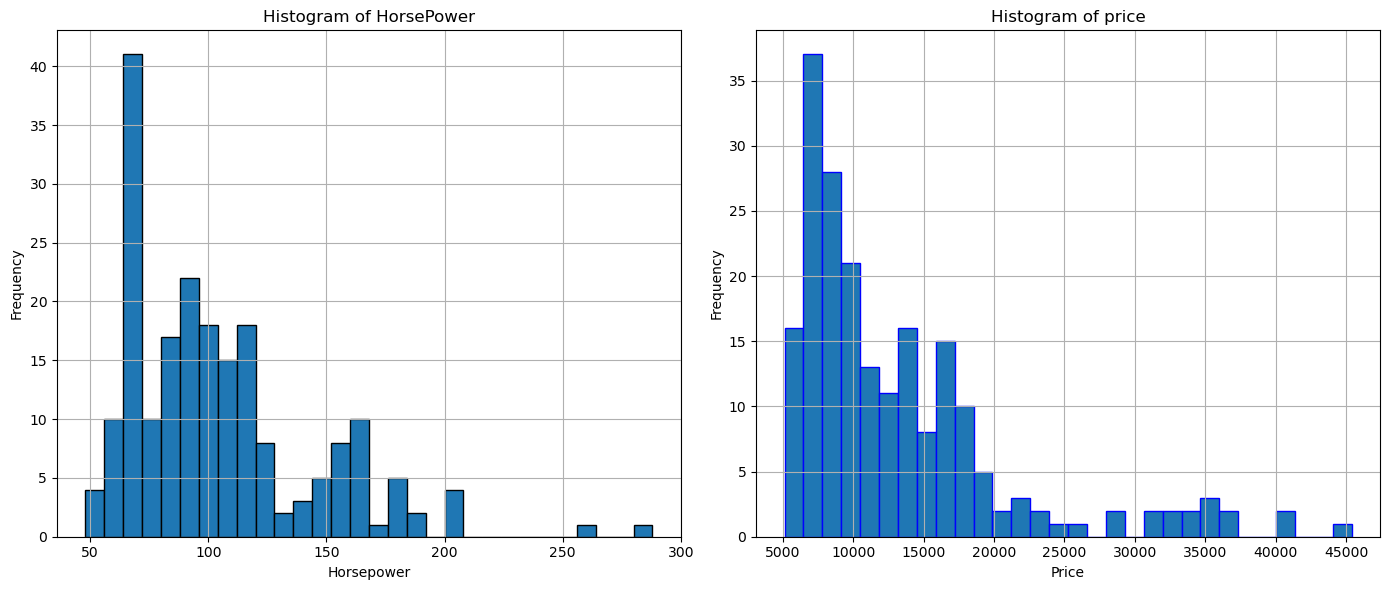

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
df['horsepower'].hist(bins=30,edgecolor='black')
plt.title('Histogram of HorsePower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
df['price'].hist(bins=30,edgecolor='blue')
plt.title('Histogram of price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

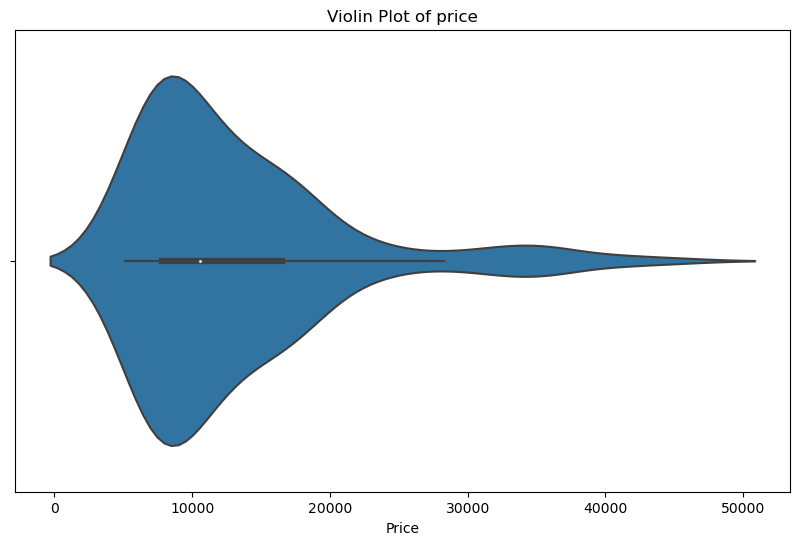

In [6]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.violinplot(x=df['price'])
plt.title('Violin Plot of price')
plt.xlabel('Price')
plt.show()

C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


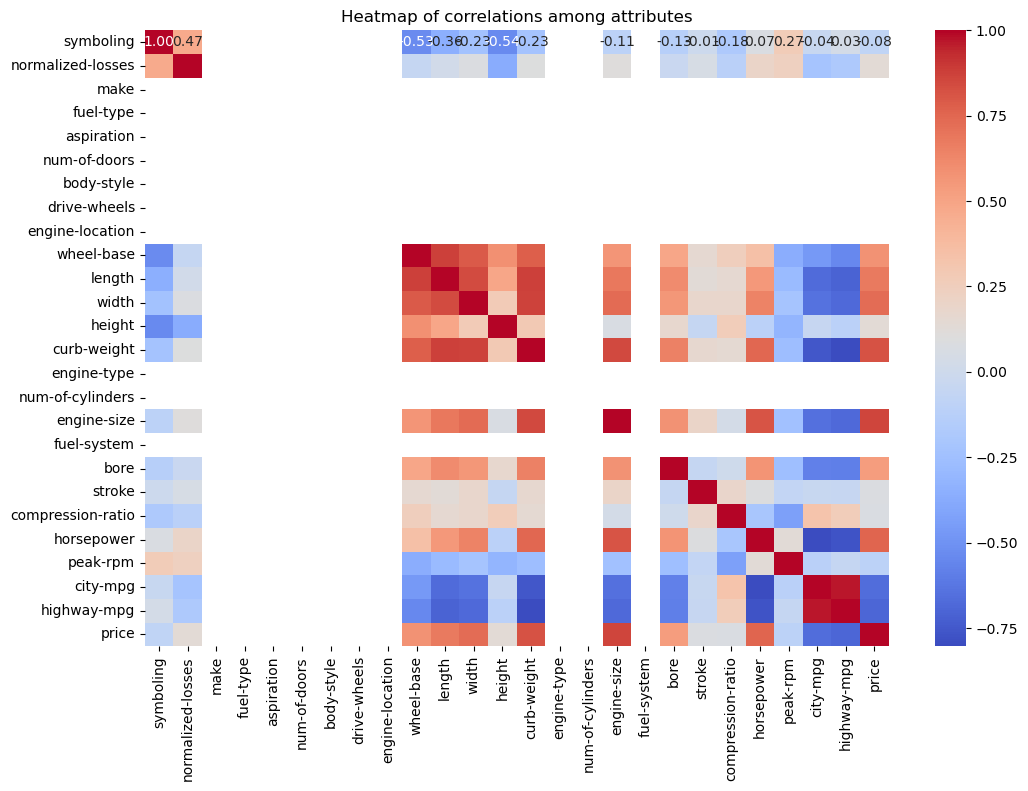

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of correlations among attributes')
plt.show()

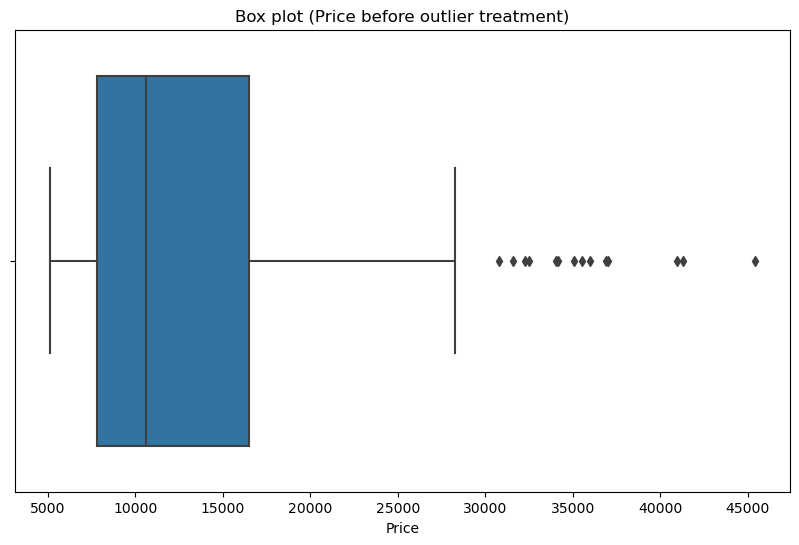

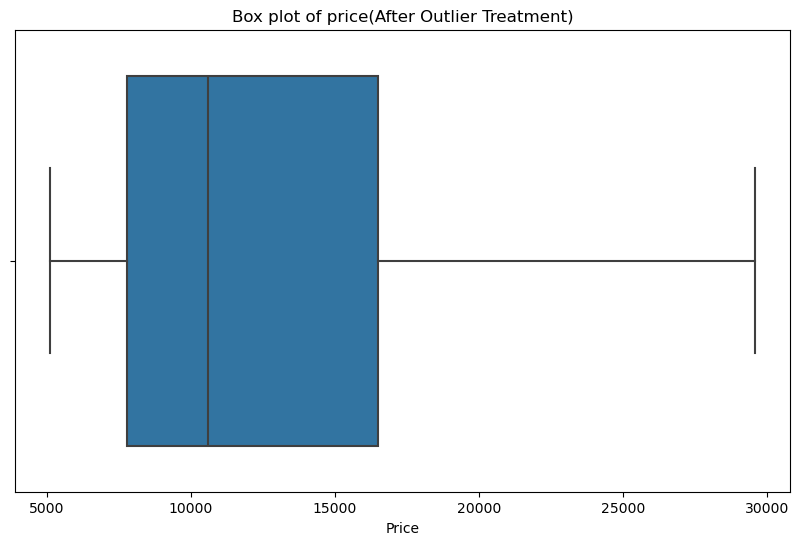

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Box plot (Price before outlier treatment)')
plt.xlabel('Price')
plt.show()

Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df['price']=df['price'].clip(lower_bound,upper_bound)

plt.figure(figsize=(10,6))
sns.boxplot(x=df['price'])
plt.title('Box plot of price(After Outlier Treatment)')
plt.xlabel('Price')
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

continous_vars=df.select_dtypes(include=['float64','int64']).columns

scaler=StandardScaler()
df[continous_vars]=scaler.fit_transform(df[continous_vars])
df.head()

C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.743470,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.690772,...,0.074449,NaN,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.110243
1,1.743470,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.690772,...,0.074449,NaN,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.567257
2,0.133509,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.708596,...,0.604046,NaN,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,0.567257
3,0.938490,1.328961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.173698,...,-0.431076,NaN,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.179442
4,0.938490,1.328961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107110,...,0.218885,NaN,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.711737


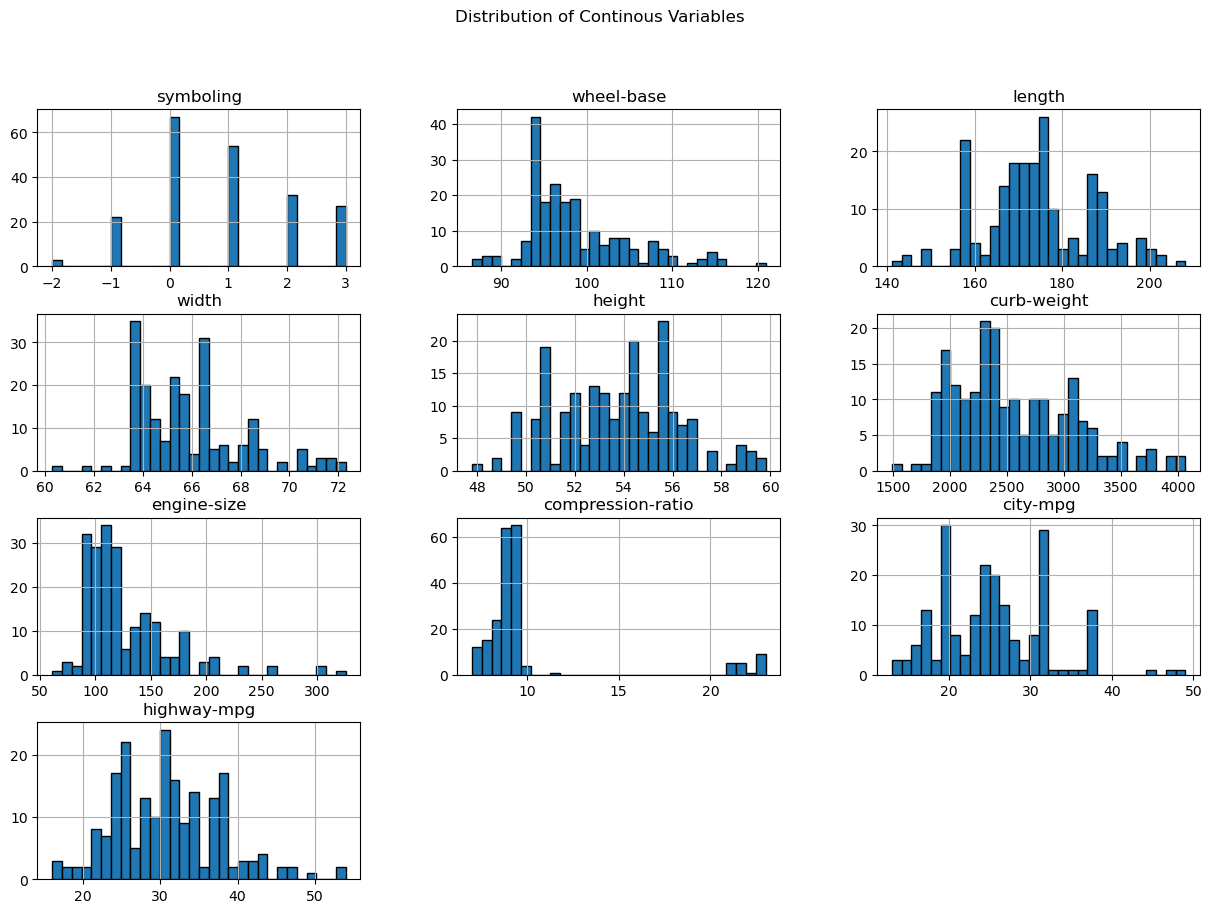

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df_automobile=pd.read_csv('C:/Users/dipay/OneDrive/Desktop/Automobile_data.csv')
numeric_df_automobile=df_automobile.select_dtypes(include=['float64','int64'])
numeric_df_automobile.hist(bins=30,figsize=(15,10),edgecolor='black')
plt.suptitle('Distribution of Continous Variables')
plt.show()

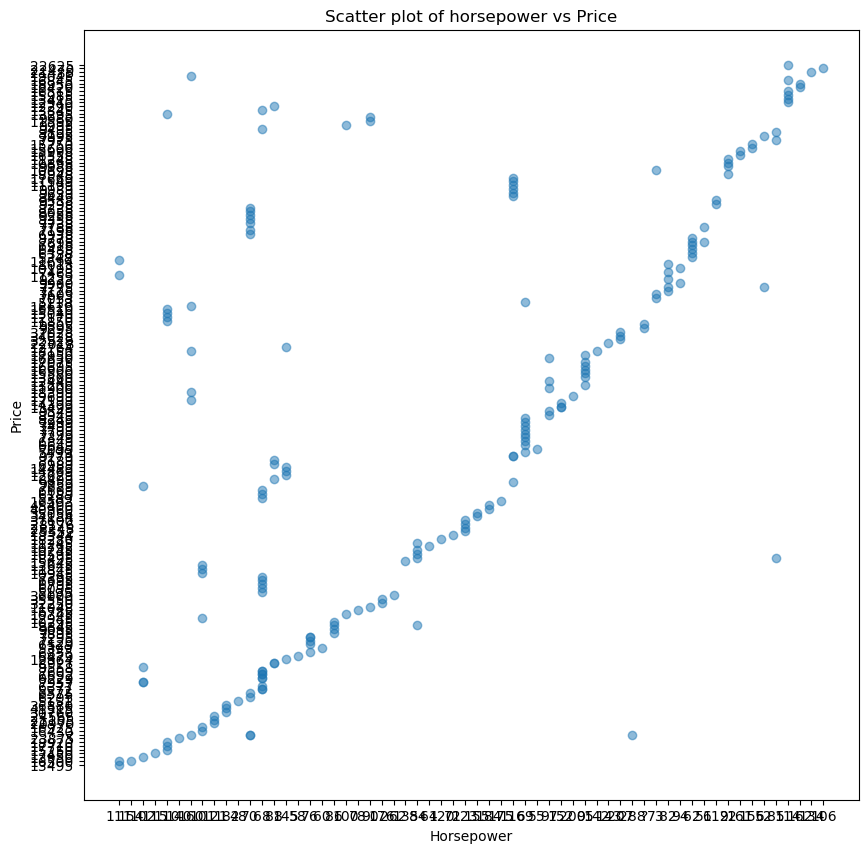

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(df_automobile['horsepower'],df_automobile['price'],alpha=0.5)
plt.title('Scatter plot of horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

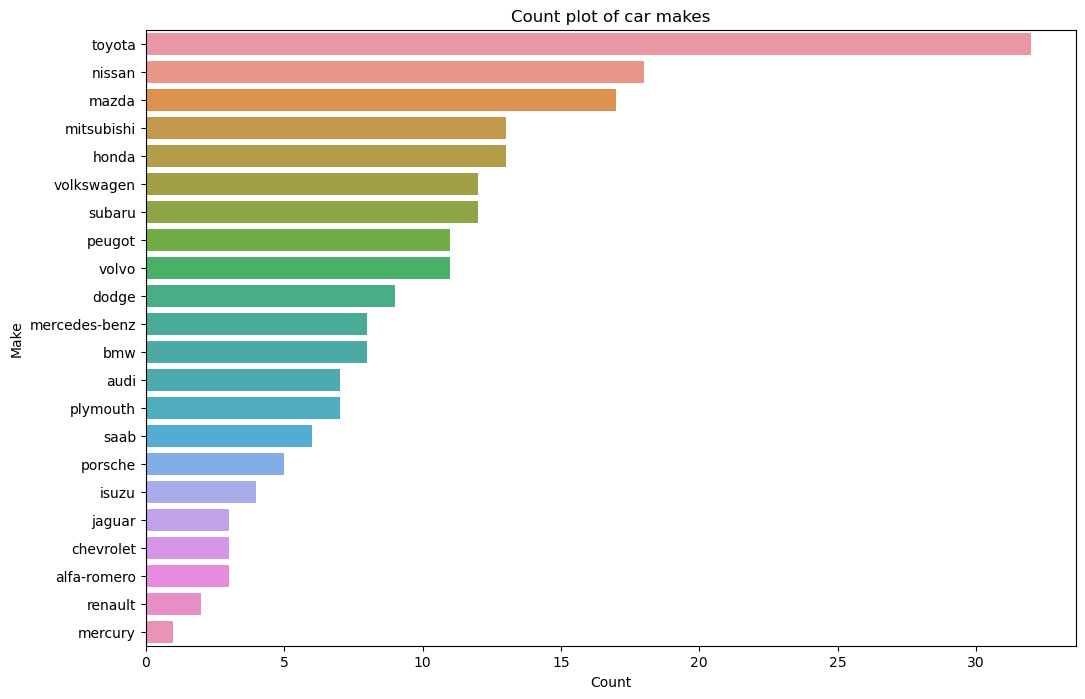

In [18]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(y=df_automobile['make'],order=df_automobile['make'].value_counts().index)
plt.title('Count plot of car makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

In [20]:
import pandas as pd

# Load the automobile dataset
df_automobile = pd.read_csv('C:/Users/dipay/OneDrive/Desktop/Automobile_data.csv')

# Display the first few rows of the dataset
print(df_automobile.head())


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [21]:
# Check data types and missing values
print(df_automobile.info())

# Convert 'price' to numeric, coercing errors to NaN
df_automobile['price'] = pd.to_numeric(df_automobile['price'], errors='coerce')

# Drop rows where 'price' or 'make' is NaN
df_automobile.dropna(subset=['price', 'make'], inplace=True)

# Display the first few rows of the cleaned dataset
print(df_automobile.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

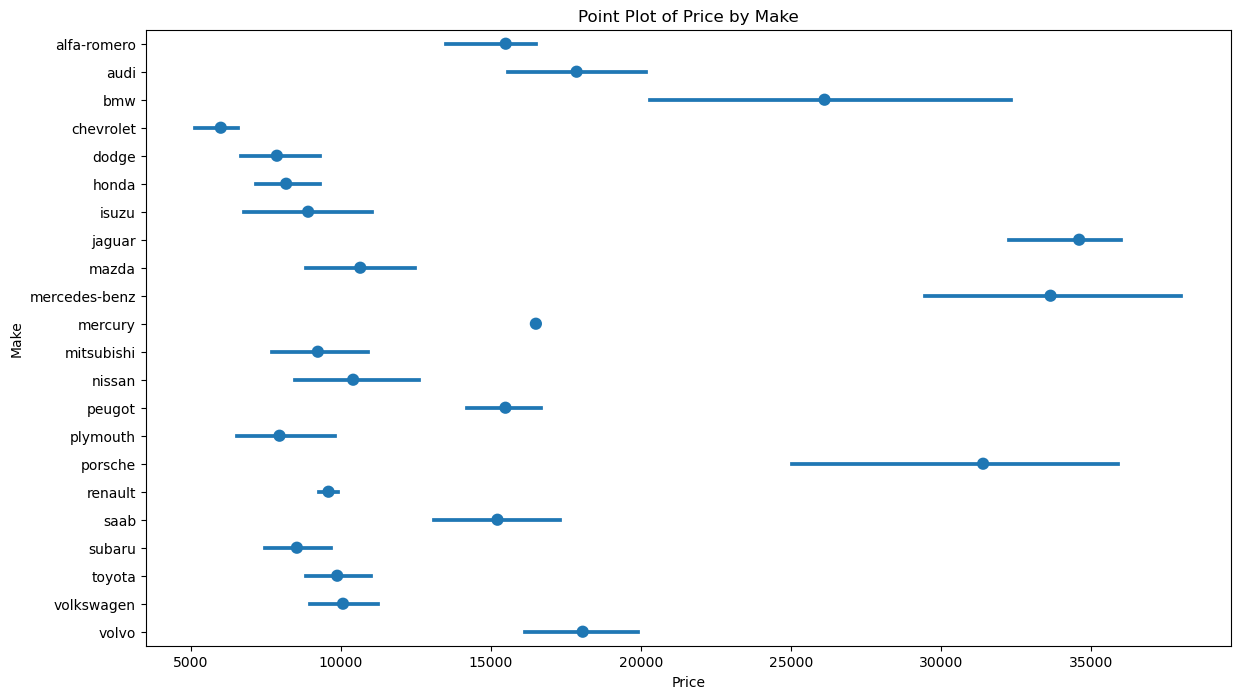

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Point plot for 'make' and 'price'
plt.figure(figsize=(14, 8))
sns.pointplot(x='price', y='make', data=df_automobile, join=False)
plt.title('Point Plot of Price by Make')
plt.xlabel('Price')
plt.ylabel('Make')
plt.show()
